## Audio classification Prac 1

### Practical Introduction to Deep Learning - AIMS 2019

***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***


### Note

Remember to change to a GPU instance otherwise training will take time!

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from os import listdir
from sklearn.model_selection import train_test_split
import zipfile
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
import IPython.display as ipd

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os


%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.


1.15.0


## Authenticate to your Google Drive

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Download the archive file which will be uncompressed to your Drive

This snippet of code will uncompress the files into a temporary folder location. In this case it is called `local_location`. We need to be consistent with names as when reading the data we will need to specify this folder name.

In [ ]:
myzip = drive.CreateFile({'id': '1wKDQrkcMGpEmGh_14Itja3ZkR7OX38s2'})
myzip.GetContentFile('Archive.zip')

print ("Uncompressing zip file")
zip_ref = zipfile.ZipFile('Archive.zip', 'r')
zip_ref.extractall('local_location/')

Uncompressing zip file


## Function to extract audio data from .wav file

In [ ]:
def extract_data_from_audio(audio_file):
  
    # Using Librosa to read a file
    audio_data, sample_rate = librosa.load(audio_file)
    return audio_data, sample_rate

## Function to extract features and targets from a directory

In [ ]:
def extract_data_from_multiple_files(directory, label):
    
    # Directory listing
    file_names = load_data(directory)
    
    # Create empty list to store features and target
    X = []
    Y = []
    
    num_files = len(file_names)
    
    # Iterate over the .wav files
    for idx, file in enumerate(file_names):

        if idx%100 == 0:
            print (str(idx)+str(' files read out of ') + str(num_files))
            
        # Extract the audio data
        data, sample_rate = extract_data_from_audio(directory+file)
        
        if len(data) == 22050:
        
            # Append the features and target
            X.append(data)
            Y.append(label)
        
    # Return the features and target as a Numpy array
    return np.array(X), np.array(Y)

## Function to get a list of .wav files

This function gets a list of all the files containing '.wav' in the file name.

In [ ]:
def load_data(directory):
    
    file_names = []
    
    # Iterate through each file in the directory
    for file in listdir(directory):
        # Check file name contains .wav
        if '.wav' in file:
            # Append the file name
            file_names.append(file)
            
    return file_names

## Load all the `dog` files into memory

Roughly 6.5 minute operation

In [ ]:
X_dog, Y_dog = extract_data_from_multiple_files('local_location/dog/', 'dog')

0 files read out of 1746
100 files read out of 1746
200 files read out of 1746
300 files read out of 1746
400 files read out of 1746
500 files read out of 1746
600 files read out of 1746
700 files read out of 1746
800 files read out of 1746
900 files read out of 1746
1000 files read out of 1746
1100 files read out of 1746
1200 files read out of 1746
1300 files read out of 1746
1400 files read out of 1746
1500 files read out of 1746
1600 files read out of 1746
1700 files read out of 1746


## Load all the `bird` files into memory

Roughly 5 minute operation

In [ ]:
X_bird, Y_bird = extract_data_from_multiple_files('local_location/bird/', 'bird')

0 files read out of 1731
100 files read out of 1731
200 files read out of 1731
300 files read out of 1731
400 files read out of 1731
500 files read out of 1731
600 files read out of 1731
700 files read out of 1731
800 files read out of 1731
900 files read out of 1731
1000 files read out of 1731
1100 files read out of 1731
1200 files read out of 1731
1300 files read out of 1731
1400 files read out of 1731
1500 files read out of 1731
1600 files read out of 1731
1700 files read out of 1731


## Create X and Y variables

In [ ]:
X = np.concatenate([X_dog, X_bird])

In [ ]:
Y = np.concatenate([Y_dog, Y_bird])

## Check shape

In [ ]:
X.shape

(3068, 22050)

In [ ]:
Y.shape

(3068,)

## Read a single .wav file

In [ ]:
audio_data, sample_rate = librosa.load("local_location/on/0ac15fe9_nohash_1.wav")

## View the data shape

In [ ]:
audio_data.shape

(22050,)

## View the first 20 points

In [ ]:
audio_data[0:20]

array([ 0.0080889 , -0.00254091, -0.0131742 , -0.0084029 , -0.0005804 ,
        0.00291141,  0.00848563,  0.01277222,  0.01087597,  0.00763148,
        0.00459751, -0.00105031, -0.0059776 , -0.00473812, -0.00029417,
       -0.00066316, -0.00633787, -0.01189952, -0.01722087, -0.02246532],
      dtype=float32)

## View the sample rate

In [ ]:
sample_rate

22050

## Parameters to view spectrogram

In [ ]:
n_fft = 1024
hop_length = 256
n_mels = 128
f_min = 1
f_max = 200

## View a spectrogram

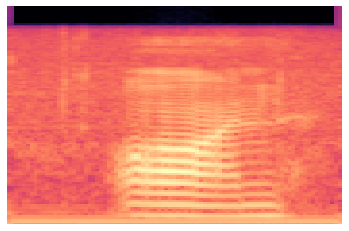

In [ ]:
plt.figure()
ax = plt.axes()
S = librosa.feature.melspectrogram(audio_data, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, sr=sample_rate, power=1.0)
librosa.display.specshow(librosa.power_to_db(S),y_axis='mel')
ax.set_axis_off()
plt.show()

## Listen

In [ ]:
ipd.Audio(audio_data, rate=sample_rate)

## Generate MFCC

In [ ]:
mfccs = librosa.feature.mfcc(audio_data, sample_rate, n_mfcc=40)

## Plot MFCC

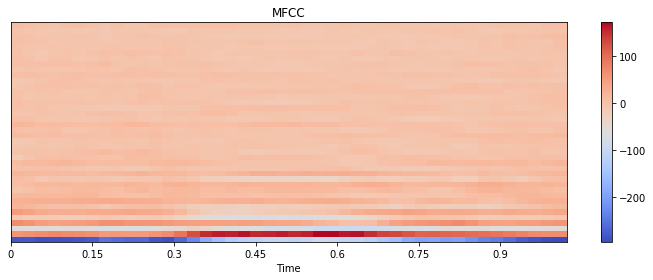

In [ ]:
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

## Convert Y values using one-hot encoding

First we need to convert the Y values into integers.

In [ ]:
vocab, inv = np.unique(Y, return_inverse=True)

In [ ]:
vocab

array(['bird', 'dog'], dtype='<U4')

## Reshape X values

Since we will use CNNs, Keras wants the data in the following format: [batches, width, depth]. In this case the depth is 1 as there is only a single feature, which is the frequencies.

In [ ]:
X = np.reshape(X, (X.shape[0],X.shape[1],1))

In [ ]:
Y = to_categorical(inv)

## Check shape

In [ ]:
X.shape

(3068, 22050, 1)

In [ ]:
Y.shape

(3068, 2)

## Split into training, validation and testing

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, shuffle=True)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

## Check shape

In [ ]:
print ('X_train:',X_train.shape)
print ('Y_train:',Y_train.shape)
print ()
print ('X_val:',X_val.shape)
print ('Y_val:',Y_val.shape)
print ()
print ('X_test:',X_test.shape)
print ('Y_test:',Y_test.shape)

X_train: (1963, 22050, 1)
Y_train: (1963, 2)

X_val: (491, 22050, 1)
Y_val: (491, 2)

X_test: (614, 22050, 1)
Y_test: (614, 2)


## Define a model

In [ ]:
def model():
    model = Sequential()
    
    model.add(keras.layers.Conv1D(16, 32, input_shape = (22050,1), padding='same'))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.40))
    model.add(keras.layers.MaxPool1D(64,))
    
    model.add(keras.layers.Conv1D(16, 16, padding='same'))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.40))
    model.add(keras.layers.MaxPool1D(32,))
    
    model.add(keras.layers.GlobalMaxPooling1D())
    
    model.add(keras.layers.Dense(2, activation='softmax'))
    
    return model

In [ ]:
model = model()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



## Compile

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

## Print out the model summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 22050, 16)         528       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 22050, 16)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22050, 16)         0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 344, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 344, 16)           4112      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 344, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 344, 16)          

## Create checkpoint

Here we create a checkpoint so that Keras will save the weights of the next best model. In this case, an improvement in validation accuracy is what it will consider as next best.

In [ ]:
filepath="weights.best"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc',verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## Train the model

Notice here, we can specify a class balance!

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
          batch_size=8,
          epochs=10,
          verbose=1, 
          callbacks=callbacks_list,
          class_weight={0:1.,1:1.0})

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1963 samples, validate on 491 samples
Epoch 1/10





1963/1963 [==============================] - 11s 6ms/step - loss: 0.4432 - acc: 0.8192 - val_loss: 0.4220 - val_acc: 0.9185

Epoch 00001: val_acc improved from -inf to 0.91853, saving model to weights.best
Epoch 2/10
1963/1963 [==============================] - 3s 2ms/step - loss: 0.2655 - acc: 0.9236 - val_loss: 0.3645 - val_acc: 0.9430

Epoch 00002: val_acc improved from 0.91853 to 0.94297, saving model to weights.best
Epoch 3/10
1963/1963 [==============================] - 3s 2ms/step - loss: 0.2121 - acc: 0.9389 - val_loss: 0.3333 - val_acc: 0.9226

Epoch 00003: val_acc did not improve from 0.94297
Epoch 4/10
1963/1963 [==============================] - 3s 2ms/step - loss: 0.1594 - acc: 0.9587 - val_loss: 0.2844 - val_acc: 0.9348

Epoch 00004: val_acc did not improve from 0.94297
Epoch 5/10
1963/1963 [=======================

## Load the weights of the best model

In [ ]:
model.load_weights('weights.best')

## Determine the training accuracy

In [ ]:
accuracy_score(model.predict_classes(X_train), np.argmax(Y_train,1))

0.9714722363728986

## Determine the testing accuracy

In [ ]:
accuracy_score(model.predict_classes(X_test), np.argmax(Y_test,1))

0.9576547231270358

## Predict on one example

In [ ]:
vocab[model.predict_classes(np.reshape(X_bird[1],(1,22050,1)))[0]]

'bird'

In [ ]:
vocab[model.predict_classes(np.reshape(X_dog[1],(1,22050,1)))[0]]

'dog'

## Predict and display the network's output values

In [ ]:
model.predict(np.reshape(X_bird[5],(1,22050,1)))

array([[0.99747413, 0.0025259 ]], dtype=float32)

## Task:

- Go through the notebook and make sure you understand each new concept introduced here.
- Another way of solving this problem is to treat the input as images instead of the raw wave values. In this script we use 1-D CNNs, but instead, we could create a dataset X and Y which contain images of spectrograms. Your task is to attempt to solve this problem by converting the audio data into spectrograms, creating a dataset and using 2-D CNNs to solve it. 

Hint 1: to achieve this you will need to use `librosa.feature.melspectrogram()` as shown above when we plotted the spectrogram. You will have to write a script to convert each audio file into a spectrogram and consequently, create a dataset of X and Y values. 

Hint 2: print out the shape of `S` in the line `S = librosa.feature.melspectrogram(...)`. This should set you on the right track.